# DATA ANALYSIS UNSING PYTHON. BLINKIT ANALYSIS

## Total Sales,Average Sales,No of Items,Average Rating

## Chart requirement == Total sales by fat content(Donut Chart),Total sales by item type(Bar chart),Fat content by outlet for Total Sale(Stacked column chart)

### import Libraries

In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### import Raw data

In [2]:
data=pd.read_csv('blinkit_data.csv')

In [3]:
data.head(30)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.100,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.800,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.850,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.150,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.600,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.890,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.800,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.700,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.750,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


### Data Details

In [4]:
data.shape

(8523, 12)

### Field info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Data Type

In [6]:
data.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### Data Cleaning

In [7]:
print(data['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [8]:
data['Item Fat Content']= data['Item Fat Content'].replace({'LF': 'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [9]:
print(data['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [10]:
data.dropna(how='all',subset=['Item Weight'],inplace=True)

### Business Requirement

#### Total Sales

In [11]:
Total_Sales = data['Sales'].sum()



In [12]:
Total_Sales

997159.2238

#### Average Sales

In [13]:
Average_Sales = data['Sales'].mean()

In [14]:
Average_Sales

141.24068325779038

#### No of Item Sold

In [15]:
No_of_items_Sold = data['Sales'].count()

In [16]:
No_of_items_Sold

7060

#### Average Rating

In [17]:
avg_Rating = data['Rating'].mean()

In [18]:
avg_Rating

3.965382436260623

In [19]:
print(f"No of Toatl_Sales: ${Total_Sales:,.0f}")

No of Toatl_Sales: $997,159


### Chart Requirement

#### Total Sales by fat content

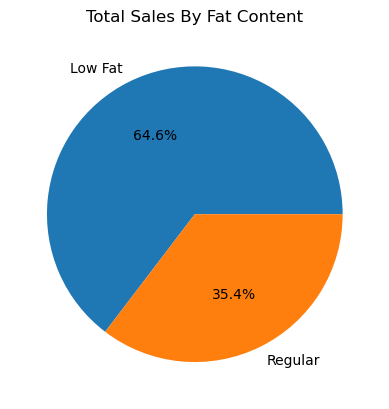

In [20]:
Sales_by_Fat = data.groupby('Item Fat Content')['Sales'].sum()
plt.pie(Sales_by_Fat, labels= Sales_by_Fat.index,autopct='%.1f%%')
plt.title('Total Sales By Fat Content')
plt.axis=('equal')
plt.show()

#### Total Sales by Item Size

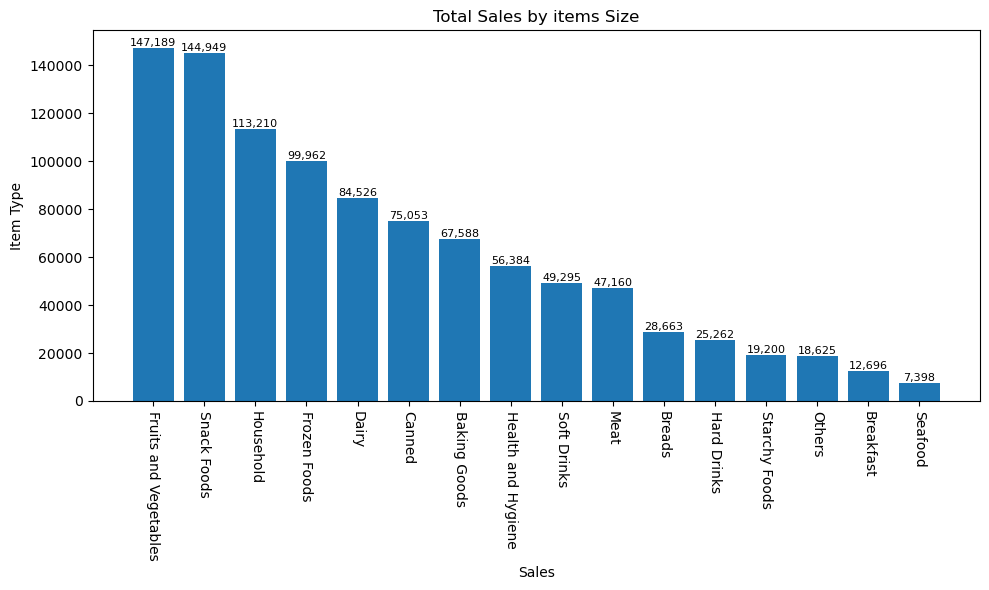

In [57]:
Total_Sales_by_Item_Size = data.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.xticks(rotation=-90)
bars = plt.bar(Total_Sales_by_Item_Size.index, Total_Sales_by_Item_Size.values)

plt.xlabel("Sales")
plt.ylabel("Item Type")
plt.title('Total Sales by items Size')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{bar.get_height():,.0f}',ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

#### Fat content by Outlet for total sales

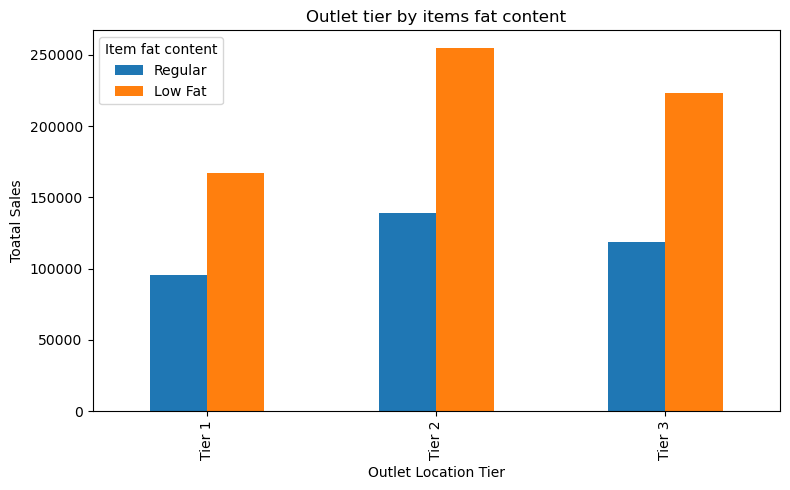

In [23]:
grouped = data.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]
ax=grouped.plot(kind='bar' ,figsize=(8,5),title="Outlet tier by items fat content")
plt.xlabel('Outlet Location Tier')
plt.ylabel('Toatal Sales')
plt.legend(title='Item fat content')
plt.tight_layout()
plt.show()

#### Total Sales by Outlet Establishment

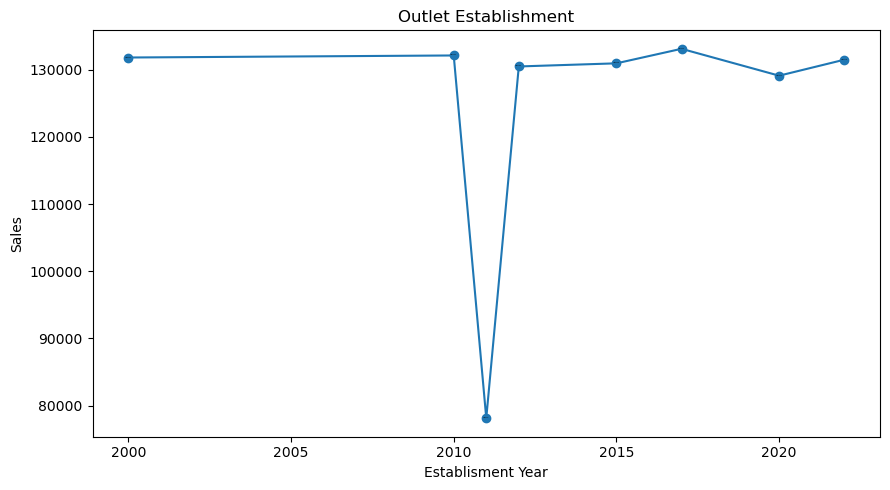

In [36]:
Sales_by_Year = data.groupby("Outlet Establishment Year")['Sales'].sum().sort_index()
plt.figure(figsize=(9,5))
plt.plot(Sales_by_Year.index,Sales_by_Year.values, marker='o',linestyle='-')
plt.xlabel('Establisment Year')
plt.ylabel('Sales')
plt.title('Outlet Establishment')
for x,y in zip(Sales_by_Year.index,Sales_by_Year.values):
    plt.text(x,y,f'{y:,.1f}',ha='center',va='bottom', fontsize=0)
plt.tight_layout()
plt.show()

#### Sales by Outlet Size

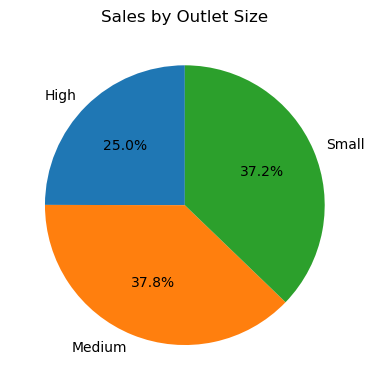

In [46]:
Sales_by_Outlet_Size= data.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(4,4))
plt.pie(Sales_by_Outlet_Size, labels=Sales_by_Outlet_Size.index,autopct='%1.1f%%', startangle=90)
plt.title('Sales by Outlet Size')
plt.tight_layout()
plt.show()

#### Sales by Outlet Location

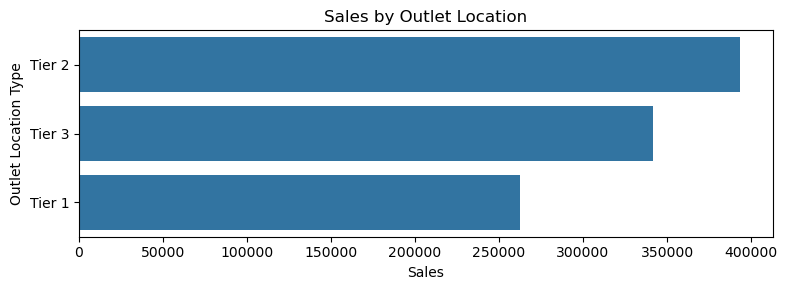

In [56]:
Sales_by_Outlet_Location=data.groupby('Outlet Location Type')['Sales'].sum().reset_index()
Sales_by_Outlet_Location=Sales_by_Outlet_Location.sort_values('Sales',ascending=False)
plt.figure(figsize=(8,3)) # Smaller height, enought width
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=Sales_by_Outlet_Location)
plt.title('Sales by Outlet Location')
plt.tight_layout()  # Ensure layout fit without scroll
plt.show()
